# 2.3.4 No Optimal Solution

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1sm_IF1p1Rl-pfWi_lkfzM8eUEWgBvQsp?usp=sharing)

When the feasible region is unbounded, a maximization problem may have no optimal solution, since the values of the decision variables may be increased arbitrarily. This can be illustrated by the problem:


$$
\begin{align*}
\text{maximize} \quad & z = 3x_1 + x_2 \\
\text{subject to} \quad &  x_1 + x_2 \geq 4 \\
& -x_1 + x_2 \leq 4 \\
& -x_1 + 2x_2 \geq -4 \\
& x_1, x_2 \geq 0 
\end{align*}
$$

**Figure 2.4** shows the unbounded feasible region and demonstrates that the objective function can be made arbitrarily large by allowing the values of $ x_1 $ and $x_2$ to grow within the unbounded feasible region. In this case, there is no point $(x_1, x_2)$ that is optimal because there are always other feasible points for which $z$ is larger.

Notice that it is not the unbounded feasible region alone that precludes an optimal solution. The *minimization* of the function subject to the constraints shown in **Figure 2.4** would be solved at extreme point A.
<br />

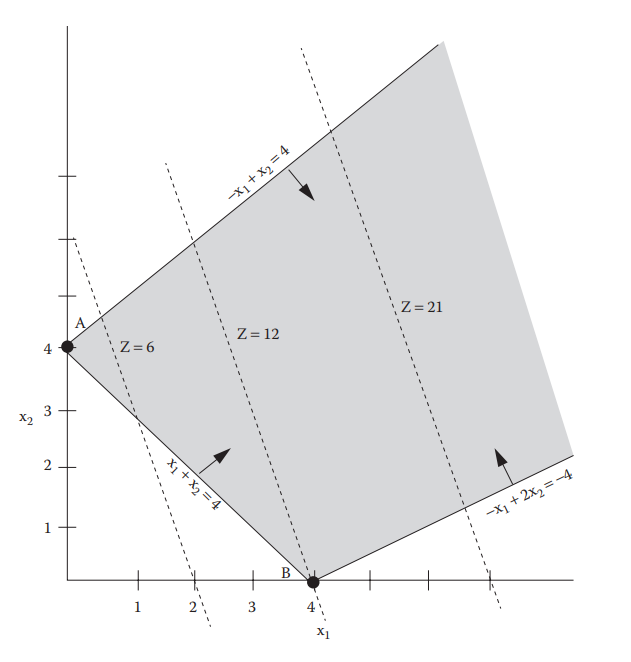
<br />

FIGURE 2.4
<br />

No optimal solution.
<br />
<br />

In practice, **unbounded solutions** typically arise because some real constraint, representing a practical resource limitation, has been omitted from the linear programming formulation. Because we do not realistically expect to be able to achieve unlimited profits or productivity, an indication of apparently unbounded solutions as seen in the previous example should be interpreted as evidence that the problem needs to be reconsidered more carefully, reformulated and re-solved.

**Code Implementation**

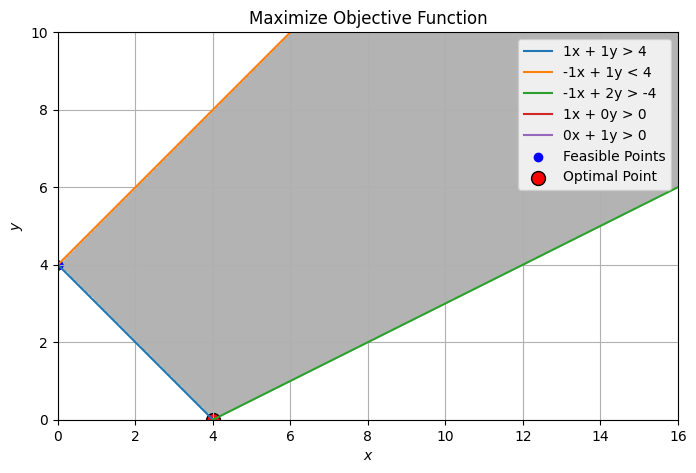

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from itertools import combinations
import ipywidgets as widgets

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 3, 1, [(1, 1, 4, '>'), (-1, 1, 4, '<'), (-1, 2, -4, '>'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()
